# DBSCAN
-------

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


## import data

In [ ]:
df = pd.read_csv('wholesale_customers_data.csv')
print(df.shape)
print(df.columns)
df.head()

(440, 8)
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.drop(['Region','Channel'],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,12669,9656,7561,214,2674,1338,-1
1,7057,9810,9568,1762,3293,1776,-1
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,-1
4,22615,5410,7198,3915,1777,5185,-1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,-1
437,14531,15488,30243,437,14841,1867,-1
438,10290,1981,2232,1038,168,2125,-1


In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

## find hyper parameters; epsilon, min_sample

2.0 6.0867747269123065


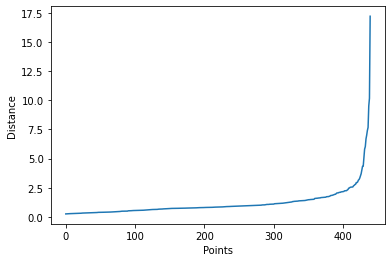

In [ ]:
neigh = NearestNeighbors(n_neighbors=11)
neigh.fit(scaled_X)
distances, indices = neigh.kneighbors(scaled_X)


plt.plot(np.sort(distances[:,10]))
plt.xlabel("Points")
plt.ylabel("Distance")

min_sample = np.log(scaled_X.shape[0])

In [54]:
from sklearn.cluster import DBSCAN
eps=0.75
min_sample=6

dbscan = DBSCAN(eps=eps,min_samples=min_sample)
dbscan.fit(scaled_X)

df['Labels'] = dbscan.labels_

df.Labels.value_counts().to_frame()

,Labels
1,165
-1,136
0,69
3,43
4,21
2,6


scaled_X shape: (440, 9)
df_pca shape: (440, 2)


Text(0, 0.5, 'y')

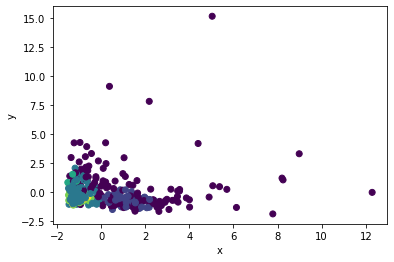

In [55]:
from sklearn.decomposition import PCA
print("scaled_X shape: {}".format(scaled_X.shape))

pca = PCA(n_components=2)

df_pca = pca.fit_transform(scaled_X)

print("df_pca shape: {}".format(df_pca.shape))

# df_v['x'] = df_v_pca[:,0]
# df_v['y'] = df_v_pca[:,1]


plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan.labels_)
plt.xlabel("x")
plt.ylabel("y")

scaled_X shape: (440, 9)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


df_tnse shape: (440, 2)


Text(0, 0.5, 'y')

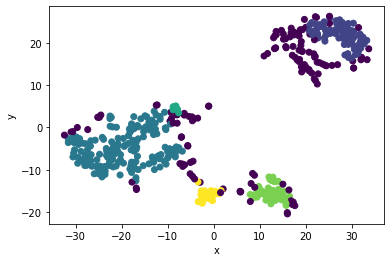

In [56]:
from sklearn.manifold import TSNE

print("scaled_X shape: {}".format(scaled_X.shape))

tsne = TSNE(n_components=2)
df_tnse = tsne.fit_transform(scaled_X)

print("df_tnse shape: {}".format(df_tnse.shape))

plt.scatter(df_tnse[:, 0], df_tnse[:, 1], c=dbscan.labels_)
plt.xlabel("x")
plt.ylabel("y")